SAI RAINA
USC ID = 4650068238
Github Username = saitiger

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\SAITIGERRAINA\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SAITIGERRAINA\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\SAITIGERRAINA\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# 1(A)

In [2]:
df_test = pd.read_csv(r'../Data/aps_failure_test_set.csv',skiprows=20)
df_train = pd.read_csv(r'../Data/aps_failure_training_set.csv',skiprows=20)

In [3]:
# df = pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])
df = pd.concat([df_test, df_train])
df.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 171 columns]

In [4]:
df.replace('na',np.nan,inplace = True)
print(" Count of Missing Values : ",df.isnull().sum().sum())

 Count of Missing Values :  1078695


In [5]:
Y = df.iloc[:,0]
X = df.iloc[:,1:]

# 1(B) i

Data imputation can be done by in various ways. One way is to drop rows when the number of rows with missing data is less
or it is inconsequential. 

Techniques of imputation include imputing with mean,median values. 
For categorical values imputation with mode/most repeated values works better.

Imputation can also be done using models which such as knn and iterative imputer. These take longer to complete as they are 
computationally expensive.

Lastly imputation can also be done using backword fill and forward fill methods which fills the data based on the 
value of the last non empty cell.

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors = 2)
# imputer = imputer.fit(X)
# df = imputer.transform(X)
# df.fillna(method='ffill',inplace = True)
# df.fillna(method='bfill',inplace = True)

In [6]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [7]:
cols = df.columns[df.dtypes.eq('object')]
cols = cols.drop('class')

In [8]:
df[cols] = df[cols].apply(pd.to_numeric,errors = 'coerce')

In [9]:
df = df.fillna(df.mean())

In [10]:
df.head() # Dataset after imputation

class  aa_000   ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60  0.00000    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82  0.00000    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002  2.00000   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816  0.72556  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814  0.72556   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

# 1(B) ii

In [11]:
m = df.mean()
s = df.std()
CV = s/m
CV_df = pd.DataFrame(CV)
CV_df.reset_index(inplace = True)

In [12]:
CV_df.rename(columns={"index": "feature", 0: "CV"},inplace = True)
CV_df

feature          CV
0    aa_000    4.328608
1    ab_000    2.178273
2    ac_000    2.167653
3    ad_000  206.721500
4    ae_000   22.293670
..      ...         ...
165  ee_007    4.885098
166  ee_008    3.335037
167  ee_009    5.753933
168  ef_000   47.919544
169  eg_000   45.650950

[170 rows x 2 columns]

# 1(B) iii

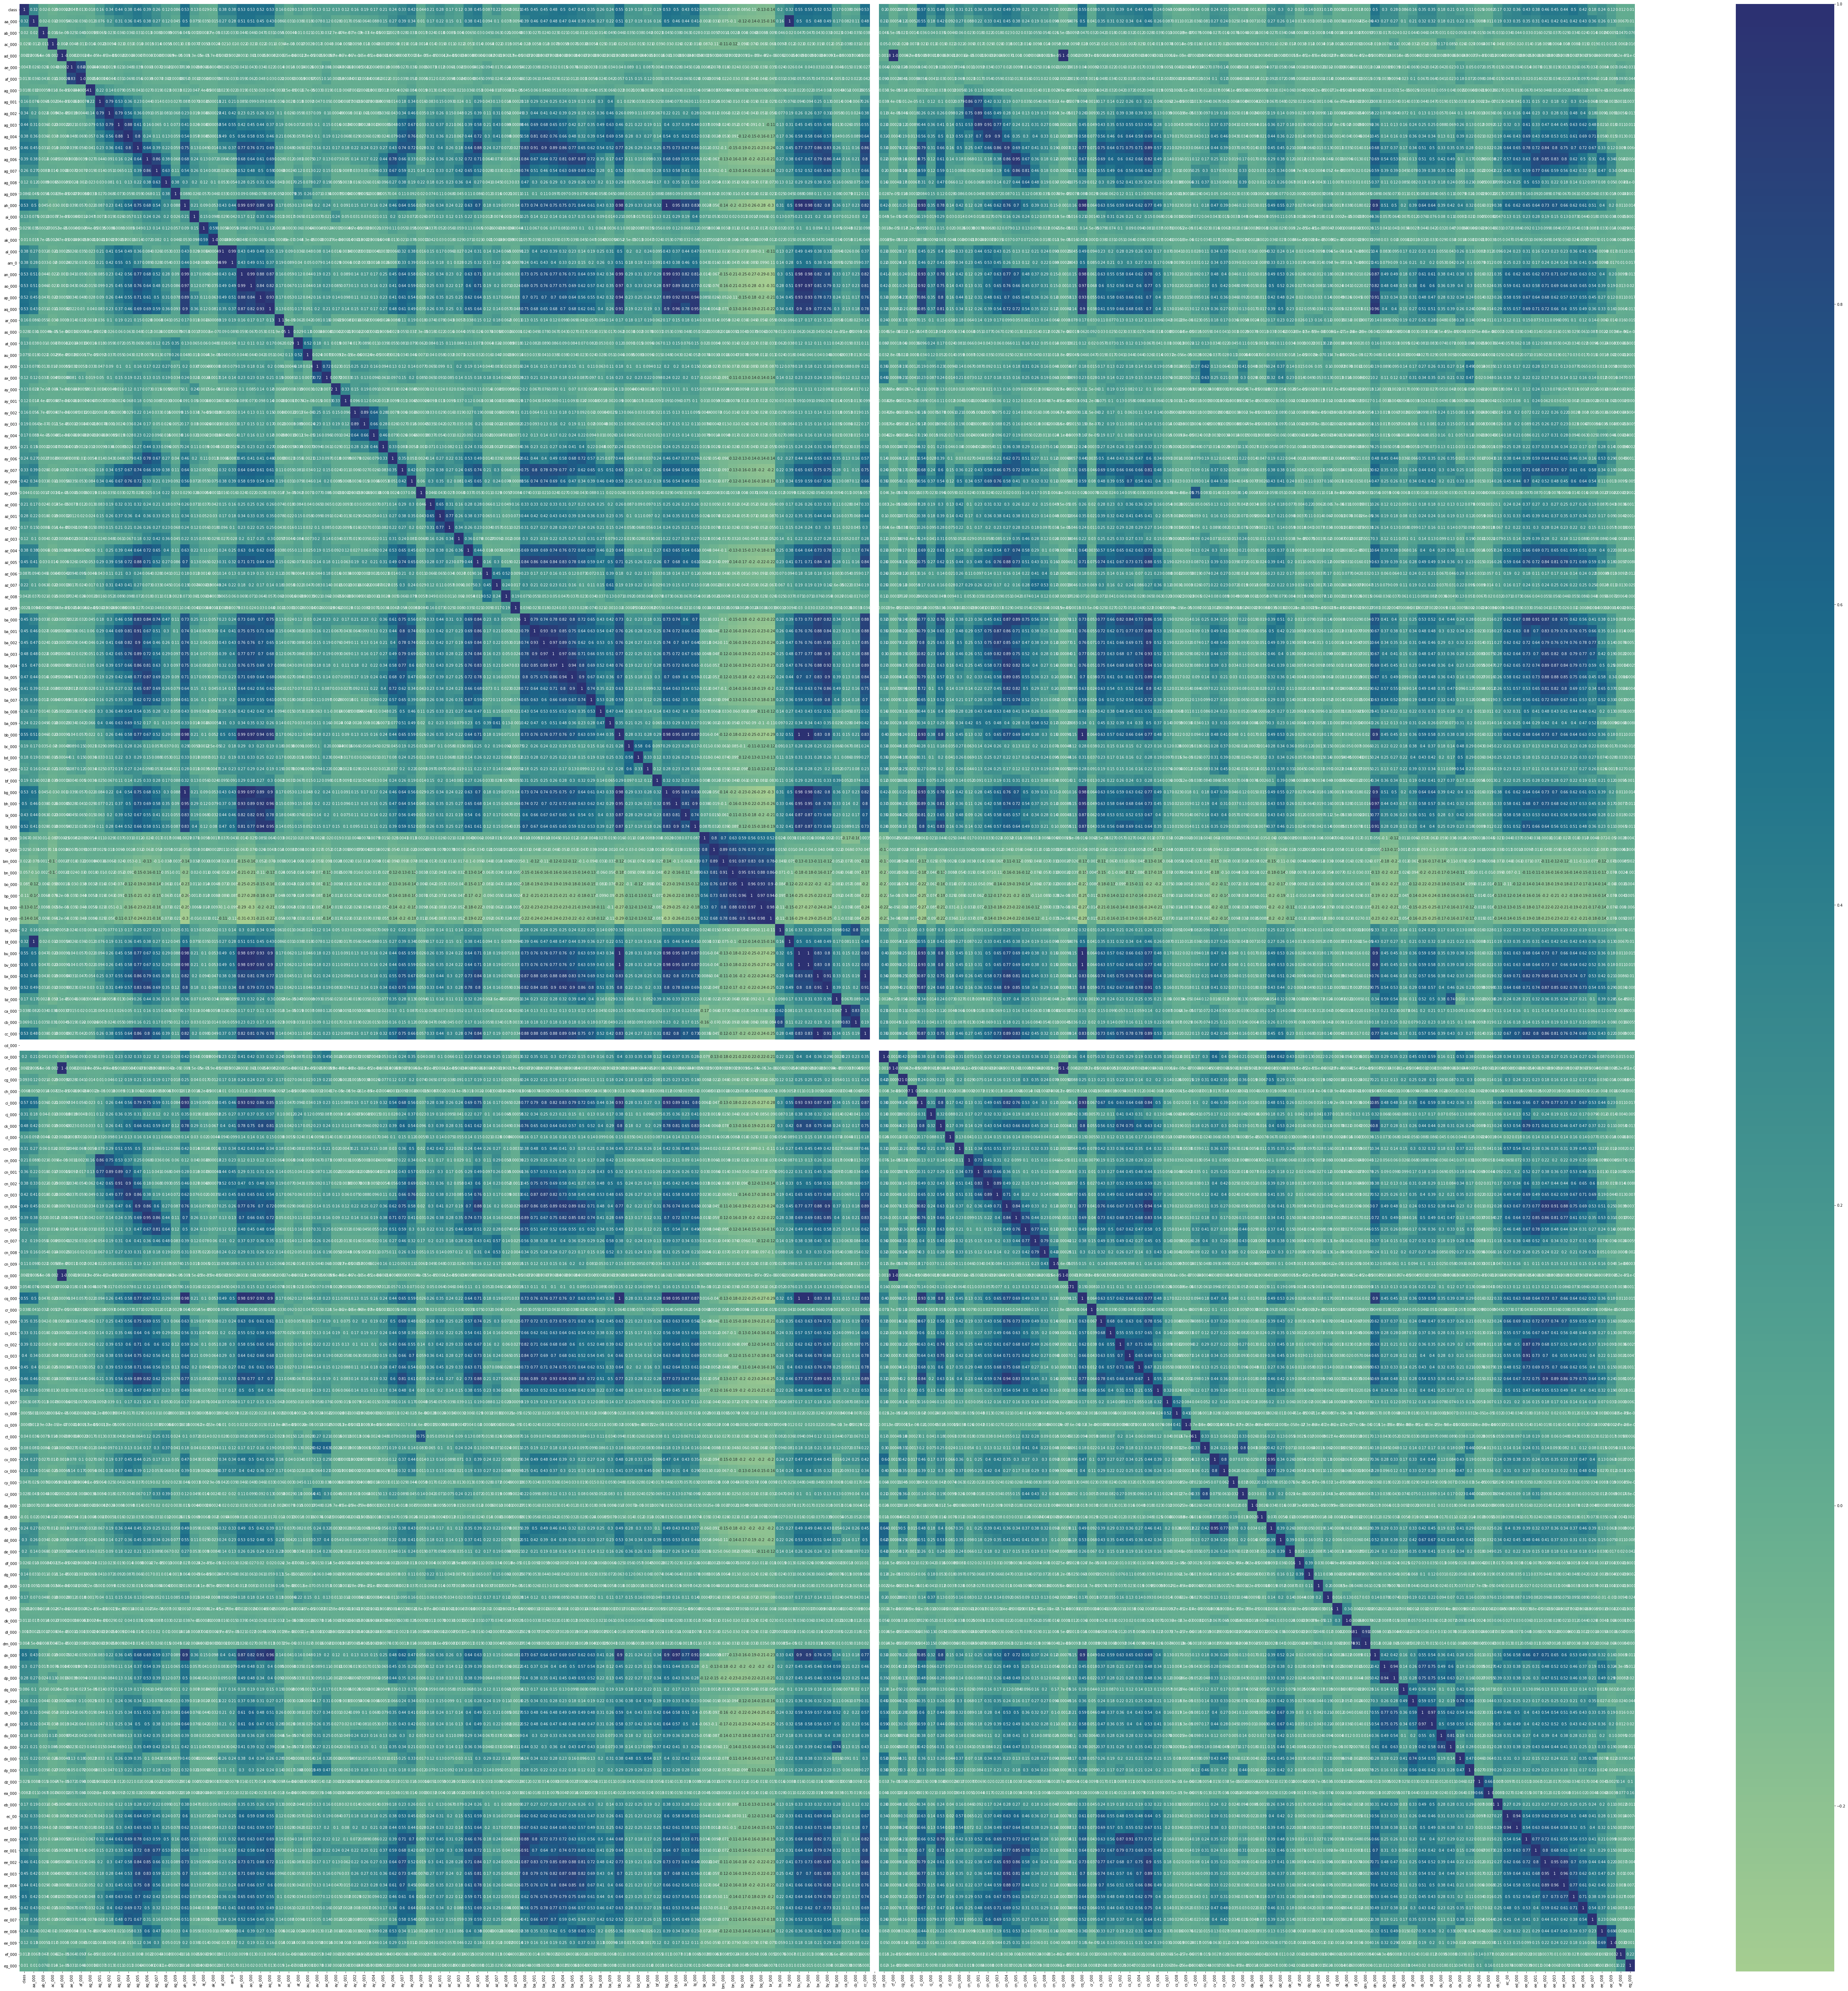

In [65]:
matrix = df.corr()
fig1 = plt.figure(figsize=(100,100))
ax = sns.heatmap(matrix, annot=True,cmap = 'crest')

In [ ]:
# 1(B) iv

In [14]:
CV_sorted = CV_df.sort_values(by = 'CV',ascending = False)
ls = list(CV_sorted.head(top_features)['feature'])
ls.append('class')

In [13]:
top_features = int(np.floor(np.sqrt(170)))
top_features

13

In [15]:
df_top_13 = df[ls]
df_top_13.head()

cf_000  co_000  ad_000  cs_009  dj_000  as_000  dh_000  df_000  ag_000  \
0     0.0     8.0    12.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     2.0    14.0    40.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0    52.0   112.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0  1278.0   936.0     0.0     0.0     0.0    60.0     0.0     0.0   
4     0.0     2.0   140.0     0.0     0.0     0.0     0.0     0.0     0.0   

   au_000  ak_000  az_009  ay_009 class  
0     0.0     0.0     0.0     2.0   neg  
1     0.0     0.0     0.0     0.0   neg  
2     0.0     0.0     0.0     0.0   neg  
3     0.0     0.0     0.0     0.0   neg  
4     0.0     0.0     0.0     0.0   neg

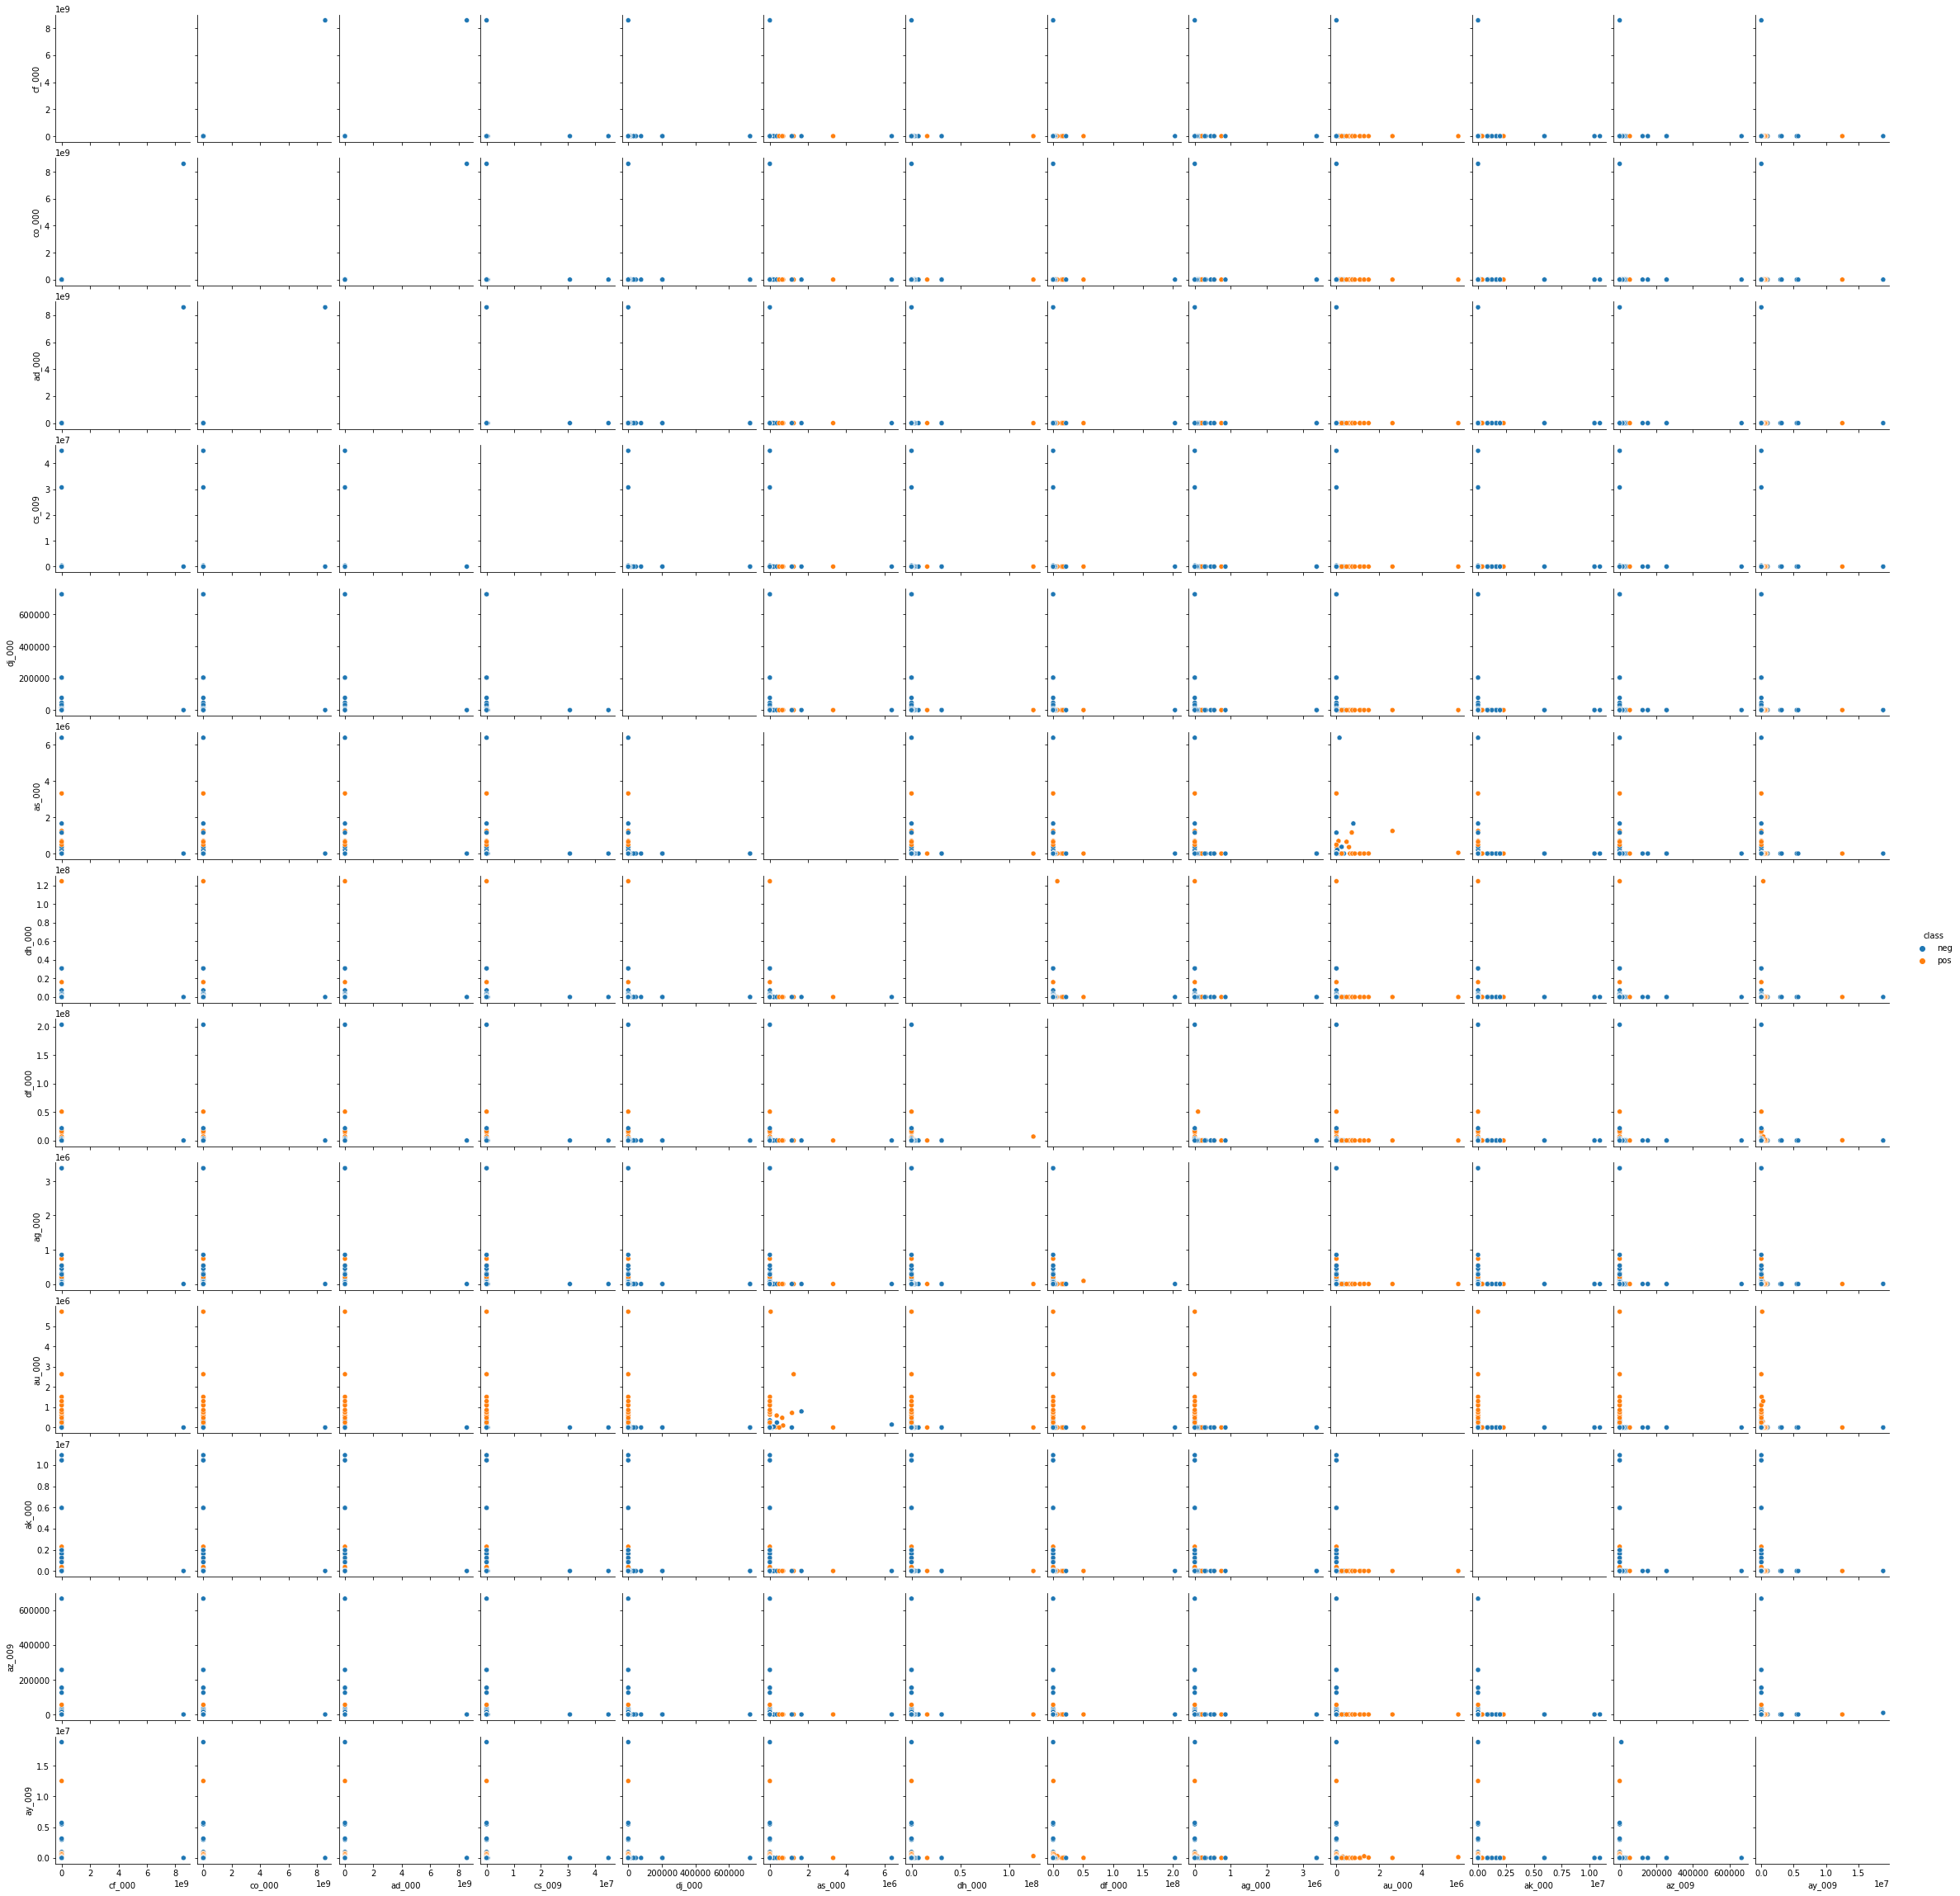

In [17]:
# sns.pairplot(df_top_13,diag_kind = 'none')
sns.pairplot(df_top_13,diag_kind = 'none',hue='class')

Just using pairplot is not enough to draw inference with high confidence to reveal feature importance.
It shows the correlation between features and the amount of variance of a feature but on its own it should not be enough to pick and choose featues.

<AxesSubplot:>

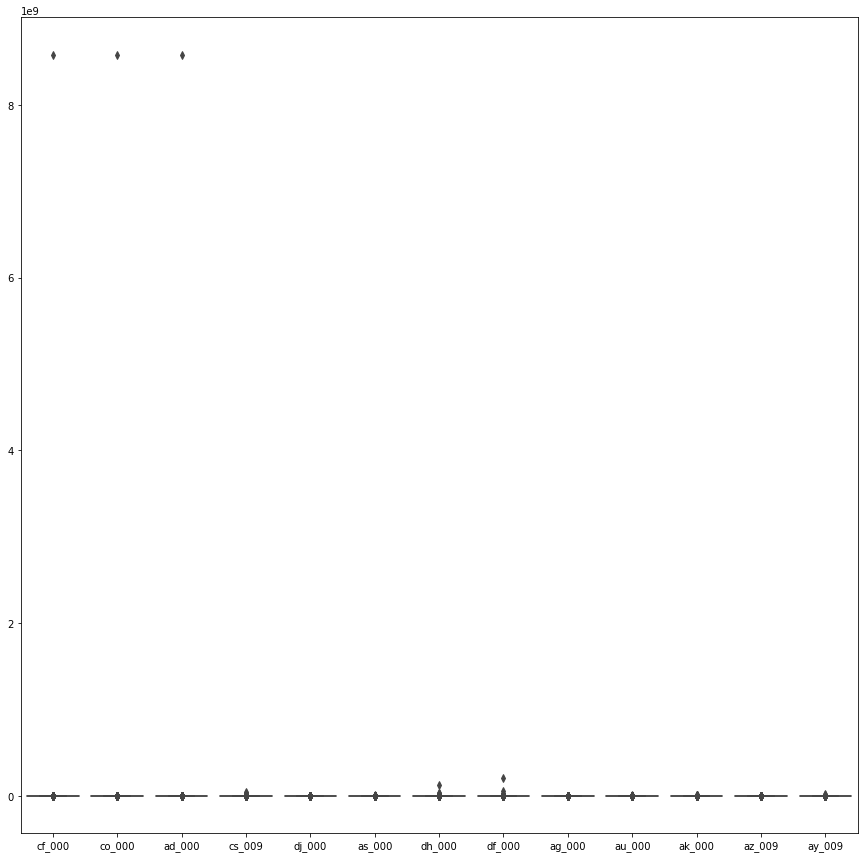

In [18]:
plt.figure(figsize=(15,15))
sns.boxplot(data = df_top_13)

In [ ]:
# 1 (B) v

neg    74625
pos     1375
Name: class, dtype: int64

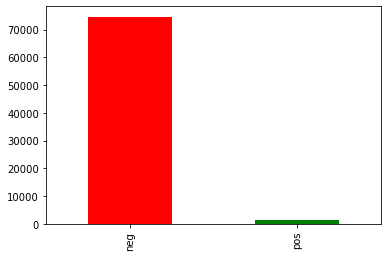

In [19]:
df['class'].value_counts().plot.bar(color=['red','green'])
df['class'].value_counts()

In [20]:
print((74625/76000)*100)

98.19078947368422


The dataset is seriously imbalanced with negative class representing 98% of the dataset

# 1 (C)

In [21]:
test = df[0:16000]
train = df[16000:]
y_train = train.iloc[:,0]
x_train = train.iloc[:,1:]
y_test = test.iloc[:,0]
x_test = test.iloc[:,1:]

In [22]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0,n_jobs = 5 ,oob_score = True)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=5, oob_score=True, random_state=0)

In [23]:
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
cnf_matrix_test = confusion_matrix(y_test, y_pred_test)
cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
acc_score_train = accuracy_score(y_train, y_pred_train) 
acc_score_test = accuracy_score(y_test, y_pred_test)

In [24]:
print("Confusion Matrix Training Set : ",cnf_matrix_train)
print("Misclassification Rate Training Set: ", 1-acc_score_train)

Confusion Matrix Training Set :  [[58978    22]
 [  812   188]]
Misclassification Rate Training Set:  0.013900000000000023


In [25]:
print("Confusion Matrix Test Set : ",cnf_matrix_test)
print("Misclassification Rate Test Set: ", 1-acc_score_test)

Confusion Matrix Test Set :  [[15624     1]
 [  304    71]]
Misclassification Rate Test Set:  0.019062499999999982


In [ ]:
# print(classification_report(y_test,y_pred_test))

In [67]:
oob_error1 = 1 - clf.oob_score_
print("OOB Error RF : ",oob_error1)

OOB Error RF :  0.014100000000000001


In [27]:
prob_x_test = clf.predict_proba(x_test)
prob_x_train = clf.predict_proba(x_train)
prob_x_train = prob_x_train[:,1]
prob_x_test = prob_x_test[:,1]

In [28]:
auc_test = roc_auc_score(y_test,prob_x_test) 
auc_train = roc_auc_score(y_train,prob_x_train) 

In [29]:
fpr_test, tpr_test, _ = roc_curve(y_test, prob_x_test,pos_label = 'pos')
fpr_train, tpr_train, _ = roc_curve(y_train, prob_x_train,pos_label = 'pos')

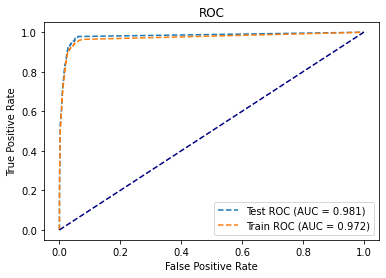

In [30]:
plt.plot(fpr_test,tpr_test, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc_test)
plt.plot(fpr_train,tpr_train, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc_train)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Test error rate = 0.019062499999999982
Out of bag score  = 0.9859
Out of bag error estimate = 1 - 0.9859 = 0.014100000000000001
oob error estimate is lower than test error rate this means that our model generalizes well even on samples which it has not seen.

# 1 (D)

To tackle imbalanced dataset with random forest 
we can use cost sensitive learning. Cost sensitive learning levies a heavier penalty on misclassifying the minority class.

This can be achieved by setting the class_weight = balanced on the RandomForestClassifier.

Another general way of addressing class imbalance is to perform data resampling i.e. undersampling,oversampling 
or combination of both using smote or other techniques.

The BalancedRandomForestClassifier class from the imbalanced-learn library implements performs random undersampling of the majority class.

In [31]:
clf2 = RandomForestClassifier(max_depth = 2, random_state = 0,n_jobs = 5 ,oob_score = True, class_weight = 'balanced')
clf2.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, n_jobs=5,
                       oob_score=True, random_state=0)

In [32]:
y_pred2 = clf2.predict(x_test)
y_pred_test2 = clf2.predict(x_test)
y_pred_train2 = clf2.predict(x_train)
cnf_matrix_test2 = confusion_matrix(y_test, y_pred_test2)
cnf_matrix_train2 = confusion_matrix(y_train, y_pred_train2)
acc_score_train2 = accuracy_score(y_train, y_pred_train2) 
acc_score_test2 = accuracy_score(y_test, y_pred_test2)

In [33]:
print("Confusion Matrix Training Set : ",cnf_matrix_train2)
print("Misclassification Rate Training Set: ", 1-acc_score_train2)
print("Confusion Matrix Test Set : ",cnf_matrix_test2)
print("Misclassification Rate Test Set: ", 1-acc_score_test2)

Confusion Matrix Training Set :  [[55203  3797]
 [   53   947]]
Misclassification Rate Training Set:  0.0641666666666667
Confusion Matrix Test Set :  [[14673   952]
 [   12   363]]
Misclassification Rate Test Set:  0.060250000000000026


In [ ]:
# print(classification_report(y_test,y_pred_test2))

In [68]:
oob_error2 = 1- clf2.oob_score_
print("OOB Error RF after handling imbalance : ", oob_error2)

OOB Error RF after handling imbalance :  0.06425000000000003


In [35]:
prob_x_test2 = clf2.predict_proba(x_test)
prob_x_train2 = clf2.predict_proba(x_train)
prob_x_train2 = prob_x_train2[:,1]
prob_x_test2 = prob_x_test2[:,1]

In [36]:
auc_test2 = roc_auc_score(y_test,prob_x_test2) 
auc_train2 = roc_auc_score(y_train,prob_x_train2) 
fpr_test2, tpr_test2, _ = roc_curve(y_test, prob_x_test2,pos_label = 'pos')
fpr_train2, tpr_train2, _ = roc_curve(y_train, prob_x_train2,pos_label = 'pos')

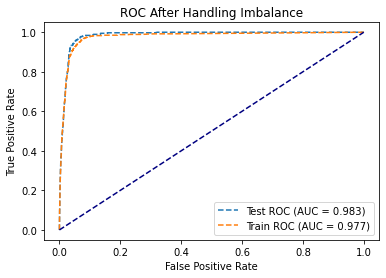

In [37]:
plt.plot(fpr_test2,tpr_test2, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc_test2)
plt.plot(fpr_train2,tpr_train2, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc_train2)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC After Handling Imbalance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

OOB error rate (Before and After compensating for imbalance)
0.014100000000000001,0.06425000000000003

Test error rate (Before and After compensating for imbalance)

0.019062499999999982,0.060250000000000026

Out of bag error rate and test error rate are both higher after compensating for imbalance.




# 1(E)

In [38]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [39]:
test = df[0:16000]
train = df[16000:]
y_train = train.iloc[:,0]
x_train = train.iloc[:,1:]
y_test = test.iloc[:,0]
x_test = test.iloc[:,1:]

In [40]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [41]:
reg_alpha_ls = [1,3,6,10]

In [42]:
xgb_gs = GridSearchCV(XGBClassifier(objective = 'binary:logistic'),
                     {
                        'reg_alpha' : reg_alpha_ls
                     }, cv = 5,scoring = 'accuracy',n_jobs = -1)
xgb_gs.fit(x_train,y_train)
xgb_res = pd.DataFrame(xgb_gs.cv_results_)
print(xgb_res)
# print(xgb_res[['params','mean_test_score']])
print('Best Estimator : ',xgb_gs.best_estimator_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      97.619751      0.978190         0.209689        0.005472   
1      76.283118      2.553073         0.209636        0.021270   
2      68.643727      2.218431         0.241276        0.029295   
3      61.133486      2.246865         0.209710        0.043887   

  param_reg_alpha             params  split0_test_score  split1_test_score  \
0               1   {'reg_alpha': 1}           0.994250           0.994667   
1               3   {'reg_alpha': 3}           0.994417           0.994750   
2               6   {'reg_alpha': 6}           0.994250           0.994333   
3              10  {'reg_alpha': 10}           0.994500           0.994667   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.993917           0.994750           0.994500         0.994417   
1           0.993917           0.994750           0.994250         0.994417   
2           0.993833           0.993

Best reg_alpha among 1,3,6,10 is 1. Choose a small range of reg_alpha since it was taking very long to run gridsearchcv.

In [43]:
model = XGBClassifier(reg_alpha = 1 ,objective = 'binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, ...)

In [44]:
cross_val_ls = cross_val_score(model, x_test, y_test, cv=5,scoring = 'accuracy')
cross_val_ls

array([0.99125  , 0.9903125, 0.9909375, 0.9909375, 0.990625 ])

In [45]:
err_rate  = 1 - np.mean(cross_val_ls)
print("Average of 5 fold cross_val_score error rate : ", err_rate)

Average of 5 fold cross_val_score error rate :  0.009187500000000015


In [46]:
y_pred3 = model.predict(x_test)
y_pred_test3 = model.predict(x_test)
y_pred_train3 = model.predict(x_train)
cnf_matrix_test3 = confusion_matrix(y_test, y_pred_test3)
cnf_matrix_train3 = confusion_matrix(y_train, y_pred_train3)
acc_score_train3 = accuracy_score(y_train, y_pred_train3) 
acc_score_test3 = accuracy_score(y_test, y_pred_test3)

In [47]:
print("Confusion Matrix Training Set : ",cnf_matrix_train3)
print("Misclassification Rate Training Set: ", 1-acc_score_train3)
print("Confusion Matrix Test Set : ",cnf_matrix_test3)
print("Misclassification Rate Test Set: ", 1-acc_score_test3)

Confusion Matrix Training Set :  [[59000     0]
 [    1   999]]
Misclassification Rate Training Set:  1.666666666666483e-05
Confusion Matrix Test Set :  [[15613    12]
 [   75   300]]
Misclassification Rate Test Set:  0.005437499999999984


In [48]:
prob_x_test3 = model.predict_proba(x_test)
prob_x_train3 = model.predict_proba(x_train)
prob_x_train3 = prob_x_train3[:,1]
prob_x_test3 = prob_x_test3[:,1]

auc_test3 = roc_auc_score(y_test,prob_x_test3) 
auc_train3 = roc_auc_score(y_train,prob_x_train3) 
fpr_test3, tpr_test3, _ = roc_curve(y_test, prob_x_test3)
fpr_train3, tpr_train3, _ = roc_curve(y_train, prob_x_train3)

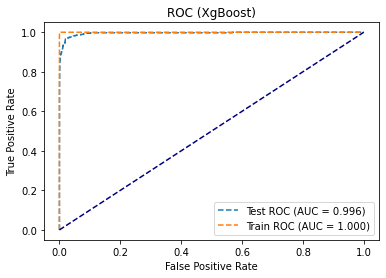

In [49]:
plt.plot(fpr_test3,tpr_test3, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc_test3)
plt.plot(fpr_train3,tpr_train3, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc_train3)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC (XgBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Cross validation score is higher than the test error rate.

# 1(F)

By doing smote inside cross validation step we are ensuring there is no data leakage which is the correct way to do cross validation.

In [50]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state = 5)],
                                ['classifier', XGBClassifier(objective = 'binary:logistic')]])

param_grid = {'classifier__reg_alpha':[1,3,6,10]}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                            n_jobs = -1)

grid_search.fit(x_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(x_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9935666666666666
Test score: 0.992875


In [54]:
print("Best Parameter : \n{}\n".format(grid_search.best_params_))

Best Parameter : 
{'classifier__reg_alpha': 1}



In [57]:
sm = SMOTE(random_state = 5)
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

In [58]:
model2 = XGBClassifier(reg_alpha = 1 ,objective = 'binary:logistic')
model2.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, ...)

In [66]:
cross_val_ls2 = cross_val_score(model2, x_test, y_test, cv=5,scoring = 'accuracy')
cross_val_ls2
err_rate2  = 1 - np.mean(cross_val_ls2)
print("Average of 5 fold cross_val_score error rate : ", err_rate2)

Average of 5 fold cross_val_score error rate :  0.009187500000000015


In [60]:
y_pred4 = model2.predict(x_test)
y_pred_test4 = model2.predict(x_test)
y_pred_train4 = model2.predict(x_train_smote)
cnf_matrix_test4 = confusion_matrix(y_test, y_pred_test4)
cnf_matrix_train4 = confusion_matrix(y_train_smote, y_pred_train4)
acc_score_train4 = accuracy_score(y_train_smote, y_pred_train4) 
acc_score_test4 = accuracy_score(y_test, y_pred_test4)

In [61]:
print("Confusion Matrix Training Set : ",cnf_matrix_train4)
print("Misclassification Rate Training Set: ", 1-acc_score_train4)
print("Confusion Matrix Test Set : ",cnf_matrix_test4)
print("Misclassification Rate Test Set: ", 1-acc_score_test4)

Confusion Matrix Training Set :  [[59000     0]
 [    2 58998]]
Misclassification Rate Training Set:  1.694915254235596e-05
Confusion Matrix Test Set :  [[15579    46]
 [   68   307]]
Misclassification Rate Test Set:  0.007125000000000048


In [62]:
prob_x_test4 = model2.predict_proba(x_test)
prob_x_train4 = model2.predict_proba(x_train_smote)
prob_x_train4 = prob_x_train4[:,1]
prob_x_test4 = prob_x_test4[:,1]

auc_test4 = roc_auc_score(y_test,prob_x_test4) 
auc_train4 = roc_auc_score(y_train_smote,prob_x_train4) 
fpr_test4, tpr_test4, _ = roc_curve(y_test, prob_x_test4)
fpr_train4, tpr_train4, _ = roc_curve(y_train_smote, prob_x_train4)

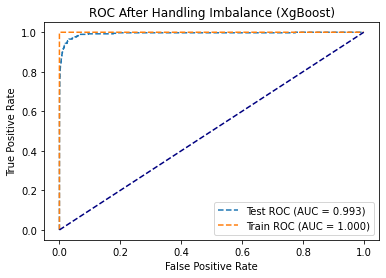

In [63]:
plt.plot(fpr_test4,tpr_test4, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc_test4)
plt.plot(fpr_train4,tpr_train4, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc_train4)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC After Handling Imbalance (XgBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Misclassification Rate Test Set:  0.005437499999999984
Misclassification Rate Test Set:  0.007125000000000048
Misclassification Rate on the test set is larger when the model is train on the synthetically balanced
dataset while the difference in the misclassification rate on training set is not very significant. Test AUC is also falls a bit on the classifier with smote applied in comparision to the first classifier on the original dataset.

References :

https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://xgboost.readthedocs.io/en/stable/parameter.html

https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

Theory questions submitted as pdf and uploaded to github. 